# TP 4 : Prise en main de Python, implémentation d'un perceptron une couche, introduction à Keras

L'objectif de ce TP est de compléter les cellules de code de ce notebook Jupyter aux emplacements indiqués par des `TODO`, puis de tester vos modifications en exécutant ces cellules.

## Exercice 1 : prise en main du langage

### a : Manipulation de listes

In [1]:
animaux = ['girafe', 'tigre', 'singe', 'souris']

# A l'aide d'une boucle, afficher chacun des éléments de la liste
# TODO
for a in animaux:
  print(a)

girafe
tigre
singe
souris


In [2]:
# Ajouter un 'chien' à la fin de la liste
# TODO
animaux.append('chien')
print(animaux)

['girafe', 'tigre', 'singe', 'souris', 'chien']


In [3]:
# Ajouter un 'chat' au tout début de la liste
# TODO

animaux.insert(0, 'chat')
print(animaux)

['chat', 'girafe', 'tigre', 'singe', 'souris', 'chien']


In [4]:
# En parcourant la liste, afficher chaque animal et son indice correspondant
# TODO
for i in range(0, len(animaux)):
  print(f"animal = {animaux[i]}, rang = {i}")

animal = chat, rang = 0
animal = girafe, rang = 1
animal = tigre, rang = 2
animal = singe, rang = 3
animal = souris, rang = 4
animal = chien, rang = 5


In [5]:
# Afficher le nombre de chiens qu'il y a dans la liste
# TODO
print(animaux.count("chien"))

1


In [6]:
# A l'aide d'une boucle, afficher les animaux pour les indices allant de 1 à 3 (inclus)
# TODO
for i in range(1,4):
  print(animaux[i])

girafe
tigre
singe


### b. Création de classes

In [7]:
# Création d'une classe Citron
class Citron:
    # Création du constructeur, la variable self fait référence aux attributs d'instance
    def __init__(self, couleur):
        self.couleur = couleur


# Instanciation d'un objet Citron, ayant pour "couleur" la valeur jaune
citron1 = Citron("jaune")

# Afficher la couleur du citron créé
# TODO
print(citron1.couleur)

jaune


In [9]:
class Citron:
    forme = "ellipsoïde"  # attribut de classe
    saveur = "acide"  # attribut de classe

    def __init__(self, couleur="jaune", taille="standard", masse=200):
        self.couleur = couleur  # attribut d'instance
        self.taille = taille  # attribut d'instance
        self.masse = masse  # attribut d'instance (masse en gramme)

    # Créer une méthode augmenter_masse(valeur) permettant d'augmenter la masse du citron
    # TODO


citron2 = Citron()
print("Attributs de classe :", citron2.forme, citron2.saveur)

# Afficher l'ensemble des attributs d'instance de citron2
# TODO

# Augmenter de 100g la masse de citron2
# TODO
citron2.masse += 100
# De nouveau afficher les attributs d'instance de citron2
# TODO
print("Attributs de classe :", citron2.forme, citron2.saveur, citron2.masse)

Attributs de classe : ellipsoïde acide
Attributs de classe : ellipsoïde acide 300


## Exercice 2 : Implémentation de la classe Perceptron




### a. Introduction à NumPy

[NumPy](https://numpy.org) est une librairie Python destinée à la manipulation des matrices et de tableaux multidimensionnels, fournissant les fonctions mathématiques nécessaires à la manipulation de ces objets.

NumPy est le socle technique de très nombreuses librairies de l'écosystème Python, notamment scikit-learn.

In [10]:
from tqdm import trange

# Import des modules python utiles aux applications d'apprentissage automatique
# Importer les bibliothèques suivantes : 
# - NumPy sous le nom "np"
# - pyplot de matplotlib sous le nom "plt"
# - pandas sous le nom "pd"
# TODO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = "retina"

In [12]:
# Création d'un tableau NumPy à une dimension (un vecteur)
v = np.array([0, 2, 4])

In [14]:
# Créer z, un tableau NumPy tel que z=[[1,2,3],[4,5,6]]
# TODO
z = np.array([[1,2,3], [4,5,6]])
print(z)

[[1 2 3]
 [4 5 6]]


In [16]:
# Afficher les formes de z et v
# TODO
print(f"dim z => {z.shape}")
print(f"dim v => {v.shape}")

dim z => (2, 3)
dim v => (3,)


In [17]:
# Afficher z multiplié par 2
# TODO
print(2*z)

[[ 2  4  6]
 [ 8 10 12]]


In [18]:
# Afficher la somme de z et v
# TODO
print(v+z)

[[ 1  4  7]
 [ 4  7 10]]


In [21]:
# Afficher le produit matriciel (dot product) de z et v
# TODO
np.dot(z,v)

array([16, 34])

### b. Création et prise en main du jeu de données : utilisation de pandas


In [78]:
# Fonction qui génère des groupes de points proches
def make_clusters(
    n_points=200,
    n_cluster=2,
    n_dimensions=2,
    classes=["A", "B"],
    locs=[(20, 25), (32, 15)],
    sigmas=[4, 4],
    balance=[1, 1],
    seed=None,
):
    """
    n_points :
    n_cluster :
    n_dimensions : 
    classes :
    locs : 
    sigmas :
    balance : 
    seed :
    """

    rs = np.random.RandomState(seed)
    X = []
    y = []
    for n in range(n_cluster):
        size = int(np.round(balance[n] * n_points))
        cluster = np.zeros((size, n_dimensions))
        for i in range(n_dimensions):
            cluster[:, i] = rs.normal(locs[n][i], sigmas[n], size=size)

        X.append(cluster)
        y.extend([classes[n] for _ in range(size)])

    return np.vstack(X), np.array(y)

In [79]:
classes = ["A", "B"]
X, labels = make_clusters(classes=classes)
y = np.array([classes.index(lbl) for lbl in labels])

# Afficher les labels y (résultats attendus)
# TODO
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [80]:
# On normalise les données contenues dans la variable X
X = (X - X.min()) / (X.max() - X.min())

In [28]:
# Afficher les formes (shapes) des données X et des labels y. Vérifier la cohérence des résultats obtenus
# TODO
print(X.shape)
print(y.shape)

(400, 2)
(400,)


#### Utilisation de pandas

In [81]:
data = np.column_stack([X,y])
df_x = pd.DataFrame(data, columns=["valeur x", "valeur y", "classe"])

# Afficher les 5 premières valeurs du Dataframe
# TODO
df_x.head(5)

,valeur x,valeur y,classe
0,0.521891,0.438699,0.0
1,0.415968,0.558869,0.0
2,0.383695,0.648102,0.0
3,0.546142,0.433944,0.0
4,0.385369,0.606793,0.0


In [32]:
# Afficher 8 valeurs au hasard du DataFrame
# TODO
df_x.sample(8)

,valeur x,valeur y,classe
82,16.657647,28.301036,0.0
46,15.601395,23.980997,0.0
53,21.551226,20.201905,0.0
113,26.123917,22.845473,0.0
342,29.592364,12.561596,1.0
96,22.967553,27.535163,0.0
254,35.230450,14.351661,1.0
352,34.231274,16.792017,1.0


In [36]:
# Afficher un résumé du DF
# TODO
df_x.describe()

,valeur x,valeur y,classe
count,400.000000,400.000000,400.000000
mean,25.951363,20.105801,0.500000
std,7.381221,6.462781,0.500626
min,9.248464,3.864517,0.000000
25%,19.961155,14.966178,0.000000
50%,25.769050,20.025852,0.500000
75%,32.072301,24.985601,1.000000
max,43.642121,37.232058,1.000000


In [ ]:
# Afficher les détails statistiques du jeu de données contenu dans le dataframe.
# TODO


In [82]:
# Les lignes ci-dessous créent des variables classX permettant de récupérer les données du dataframe 
# associées resp. aux classes 1 et 2, tout en supprimant les valeurs nulles. 
class1 = df_x.where(df_x['classe']==1).dropna()
class0 = df_x.where(df_x['classe']==0).dropna()

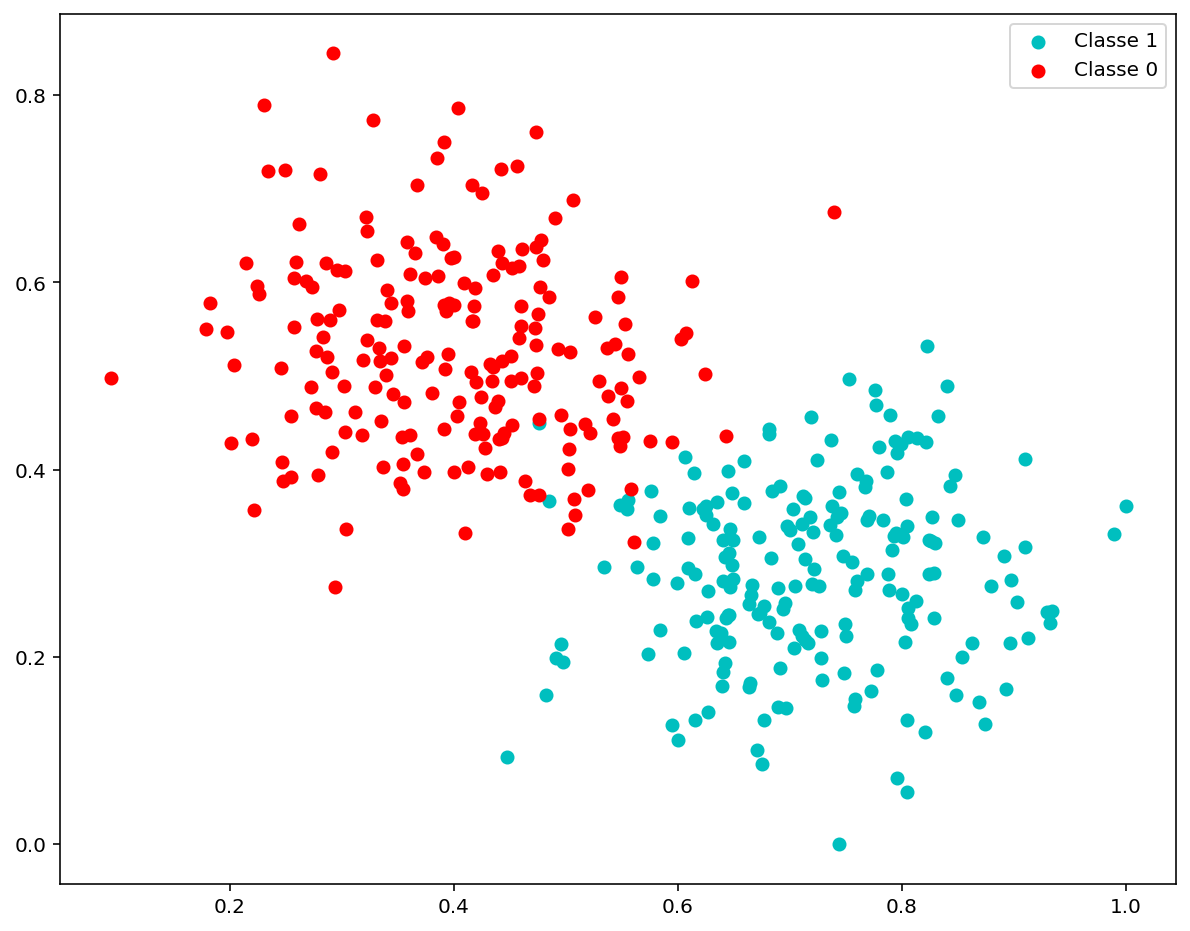

In [83]:
# On affiche les données avec leur classe
plt.scatter(class1['valeur x'], class1['valeur y'], color='c', label="Classe 1" )
plt.scatter(class0['valeur x'], class0['valeur y'], color='r', label="Classe 0" )
plt.legend()
plt.show()

### c. Implémentation du perceptron

In [40]:
def heaviside(x):
    # Fonction seuil
    # if x <= 0:
    #     return 0.0
    # return 1.0
    return np.where(x < 0, 0.0, 1.0)


def sigmoid(x):
    # Définir la fonction sigmoïde (utiliser np.exp())
    # TODO
    return 1/(1+np.exp(-x))


def tanh(x):
    # Définir la fonction tangente hyperbolique
    # TODO
    return np.sinh(x)/np.cosh(x)

In [88]:
class Perceptron:
    """
        La classe Perceptron contient les méthodes nécessaires 
        à la création d'un algorithme de perceptron à une couche. Elle
        possède les paramètres :
        
        input_dim : taille de la dimension des données d'entrées
        activation_fn : fonction d'activation apliquée à la sortie du neurone
        learning_rate : coefficient d'apprentissage utilisé pour la modification des poids
        threashold : seuil utilisé pour la classification
    """

    def __init__(
        self, input_dim=2, activation_fn=sigmoid, learning_rate=0.01, threshold=0.5,
    ):

        # Mémoriser les paramètres du constructeur dans des attributs
        # TODO
        self.input_dim = input_dim
        self.activation_fn = activation_fn
        self.learning_rate = learning_rate
        self.threshold = threshold

        # Initialisation des poids et du terme de biais
        self.weights = np.random.uniform(size=input_dim)
        self.bias = np.random.uniform(size=1)

    def predict(self, inputs):
        # Calcule et renvoie la sortie du perceptron = somme des entrées pondérées par les poids + biais
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation_fn(weighted_sum)

    def predict_class(self, inputs):
        # Renvoie la classe des entrées (0 ou 1)
        prediction = self.predict(inputs)
        return np.where(prediction < self.threshold, 0, 1)

    def train(self, x, y, epochs=10):
        # Pour chaque itération
        for _ in trange(epochs):
            # Pour chaque entrée associée à sa sortie
            for inputs, label in zip(x, y):
                assert inputs.shape == (self.input_dim,)

                # Calculer la prédiction du modèle
                # TODO
                prediction = self.predict(inputs)
                # Calculer l'erreur (sortie attendue - sortie réelle)
                # TODO
                error = label - prediction
                # Mettre à jour les poids et le biais
                # TODO

                self.weights += self.learning_rate*error*inputs
                self.bias += self.learning_rate*error*1

    def evaluate(self, x, y):
        # Calcul de la justesse (accuracy) = % de bonnes prédictions
        predicted_classes = self.predict_class(x)
        accuracy = np.sum(predicted_classes == y) / y.size
        return accuracy

### d. Test du perceptron

In [89]:
# Affiche les données et la frontière de décision du modèle
def plot_training(model, X, y, n_points=100):
    mesh_x1, mesh_x2 = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), n_points),
        np.linspace(X[:, 1].min(), X[:, 1].max(), n_points),
    )

    mesh_response = []
    for x1, x2 in zip(mesh_x1.ravel(), mesh_x2.ravel()):
        mesh_response.append(model.predict_class([x1, x2]))

    mesh_response = np.array(mesh_response).reshape(n_points, n_points)

    plt.contourf(mesh_x1, mesh_x2, mesh_response)
    plt.scatter(X[:, 0], X[:, 1])

In [90]:
# Crée un perceptron avec 2 entrées et la fonction d'activation seuil
model1 = Perceptron(input_dim=2, activation_fn=heaviside)

# Entrainer le perceptron sur le jeu de données pendant 100 itérations
# TODO
model1.train(X, y, 100)


100%|██████████| 100/100 [00:00<00:00, 137.37it/s]


[ 0.14589676 -0.24296276] [0.02785964]
Accuracy: 0.9525


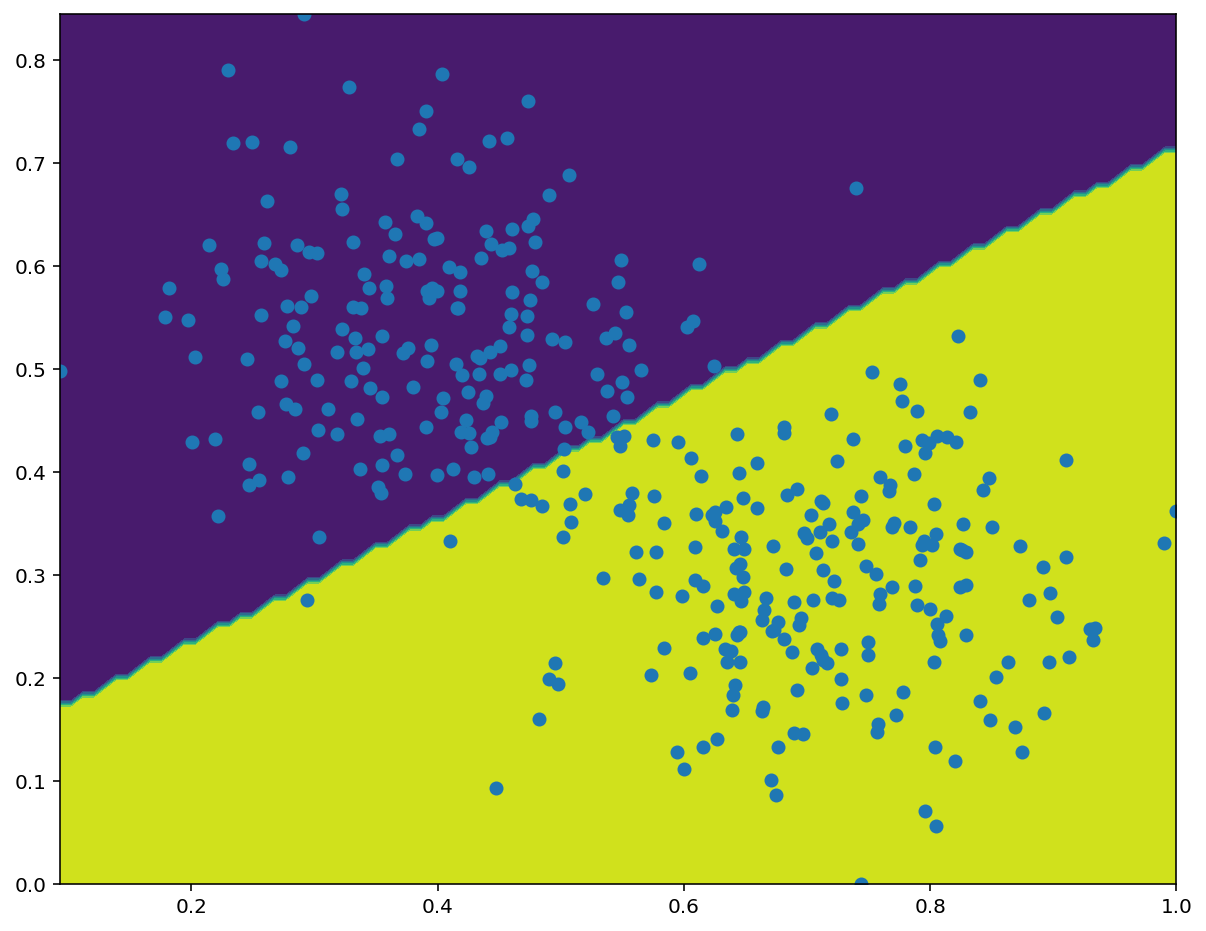

In [91]:
def show_results(model, x, y):
    print(model.weights, model.bias)
    print(f"Accuracy: {model.evaluate(X, y)}")

    plot_training(model, X, y)


# Afficher les résultats du perceptron
# TODO
show_results(model1, X, y)

In [92]:
# Créer un perceptron avec 2 entrées et la fonction d'activation sigmoide
# TODO
model2 = Perceptron()
# Entrainer le perceptron sur le jeu de données pendant 100 itérations
# TODO
model2.train(X,y, 100)

100%|██████████| 100/100 [00:00<00:00, 103.21it/s]


[ 9.33982133 -7.98853862] [-1.84575774]
Accuracy: 0.9775


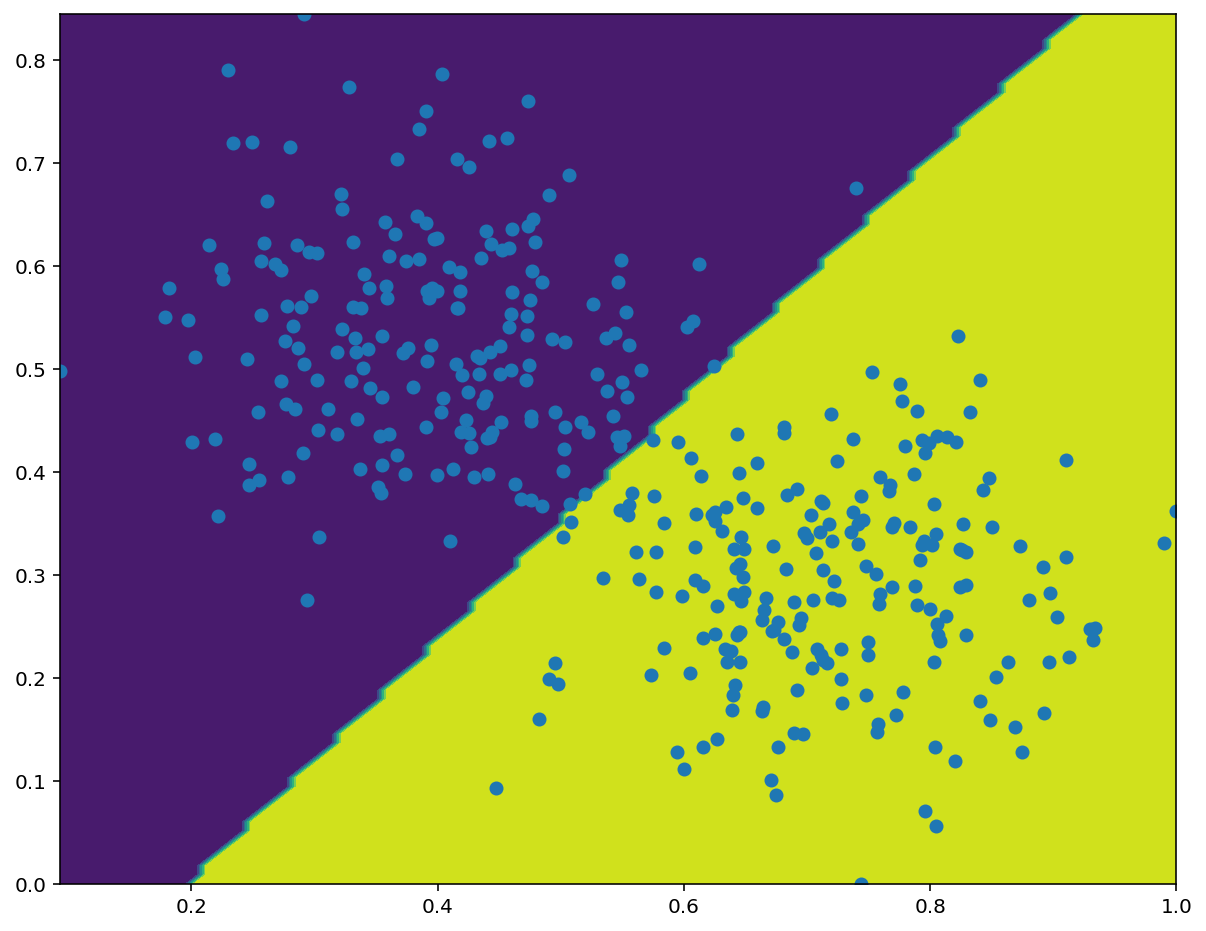

In [93]:
# Afficher les résultats du perceptron
# TODO
show_results(model2, X, y)

In [ ]:
# Tester l'apprentissage de différents modèles en créant différents perceptrons. Vous pouvez modifier
# la fonction d'activation, la valeur du coefficient d'apprentissage et le nombre d'epochs sur lesquelles est effectué
# l'apprentissage.
# TODO

## Exercice 3 : introduction à Keras

[Keras](https://keras.io/) est une API simple et efficace pour créer et entrainer des réseaux de neurones. En arrière-plan, les calculs sont réalisés par la librairie [TensorFlow](https://www.tensorflow.org/).

In [94]:
from matplotlib.colors import ListedColormap

# Pour générer des données avec scikit-learn
from sklearn.datasets import make_moons, make_circles

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [96]:
def plot_planar_data(X, y):
    """Plot some 2D data"""

    plt.figure()
    plt.plot(X[y == 0, 0], X[y == 0, 1], "or", alpha=0.5, label=0)
    plt.plot(X[y == 1, 0], X[y == 1, 1], "ob", alpha=0.5, label=1)
    plt.legend()


def plot_decision_boundary(pred_func, X, y, figure=None):
    """Plot a decision boundary"""

    if figure is None:  # If no figure is given, create a new one
        plt.figure()
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)


def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy
    Takes a Keras History object as parameter"""

    loss = history.history["loss"]
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, ".--", label="Training loss")
    final_loss = loss[-1]
    title = "Training loss: {:.4f}".format(final_loss)
    plt.ylabel("Loss")
    if "val_loss" in history.history:
        val_loss = history.history["val_loss"]
        plt.plot(epochs, val_loss, "o-", label="Validation loss")
        final_val_loss = val_loss[-1]
        title += ", Validation loss: {:.4f}".format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history["accuracy"]

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, ".--", label="Training acc")
    final_acc = acc[-1]
    title = "Training accuracy: {:.2f}%".format(final_acc * 100)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    if "val_accuracy" in history.history:
        val_acc = history.history["val_accuracy"]
        plt.plot(epochs, val_acc, "o-", label="Validation acc")
        final_val_acc = val_acc[-1]
        title += ", Validation accuracy: {:.2f}%".format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

x_train: (1000, 2). y_train: (1000,)


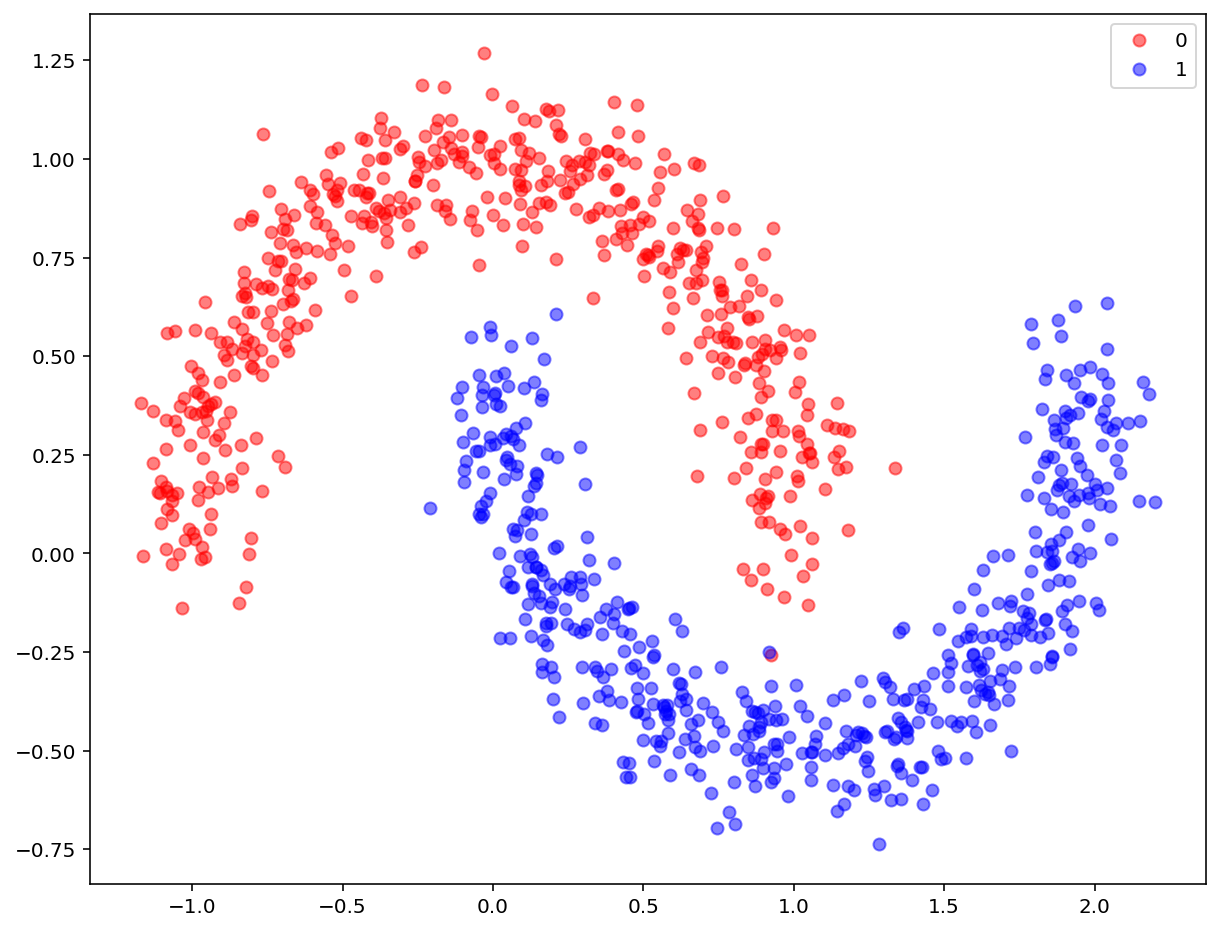

In [97]:
# On génère des demi-lunes pour faire de la classification binaire
x_train, y_train = make_moons(n_samples=1000, noise=0.10, random_state=0)

print(f"x_train: {x_train.shape}. y_train: {y_train.shape}")
plot_planar_data(x_train, y_train)

In [98]:
# Modèle séquentiel : empilement de couches
model = Sequential()

# Ajoute une couche cachée avec 3 neurones, tanh comme fonction d'activation et 2 entrées
model.add(Dense(units=3, activation="tanh", input_shape=(2,)))

# Ajoute une couche de sortie avec 1 neurone et une fonction sigmoide
model.add(Dense(1, activation="sigmoid"))

# Décrit le modèle
# Question: saurez-vous justifier le nombre de paramètres affiché par Keras ?
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Configuration de l'entrainement
model.compile(
    optimizer=SGD(learning_rate=1.0), loss="binary_crossentropy", metrics=["accuracy"]
)

# Entrainement du modèle pendant 40 itérations
history = model.fit(x_train, y_train, verbose=0, epochs=40)

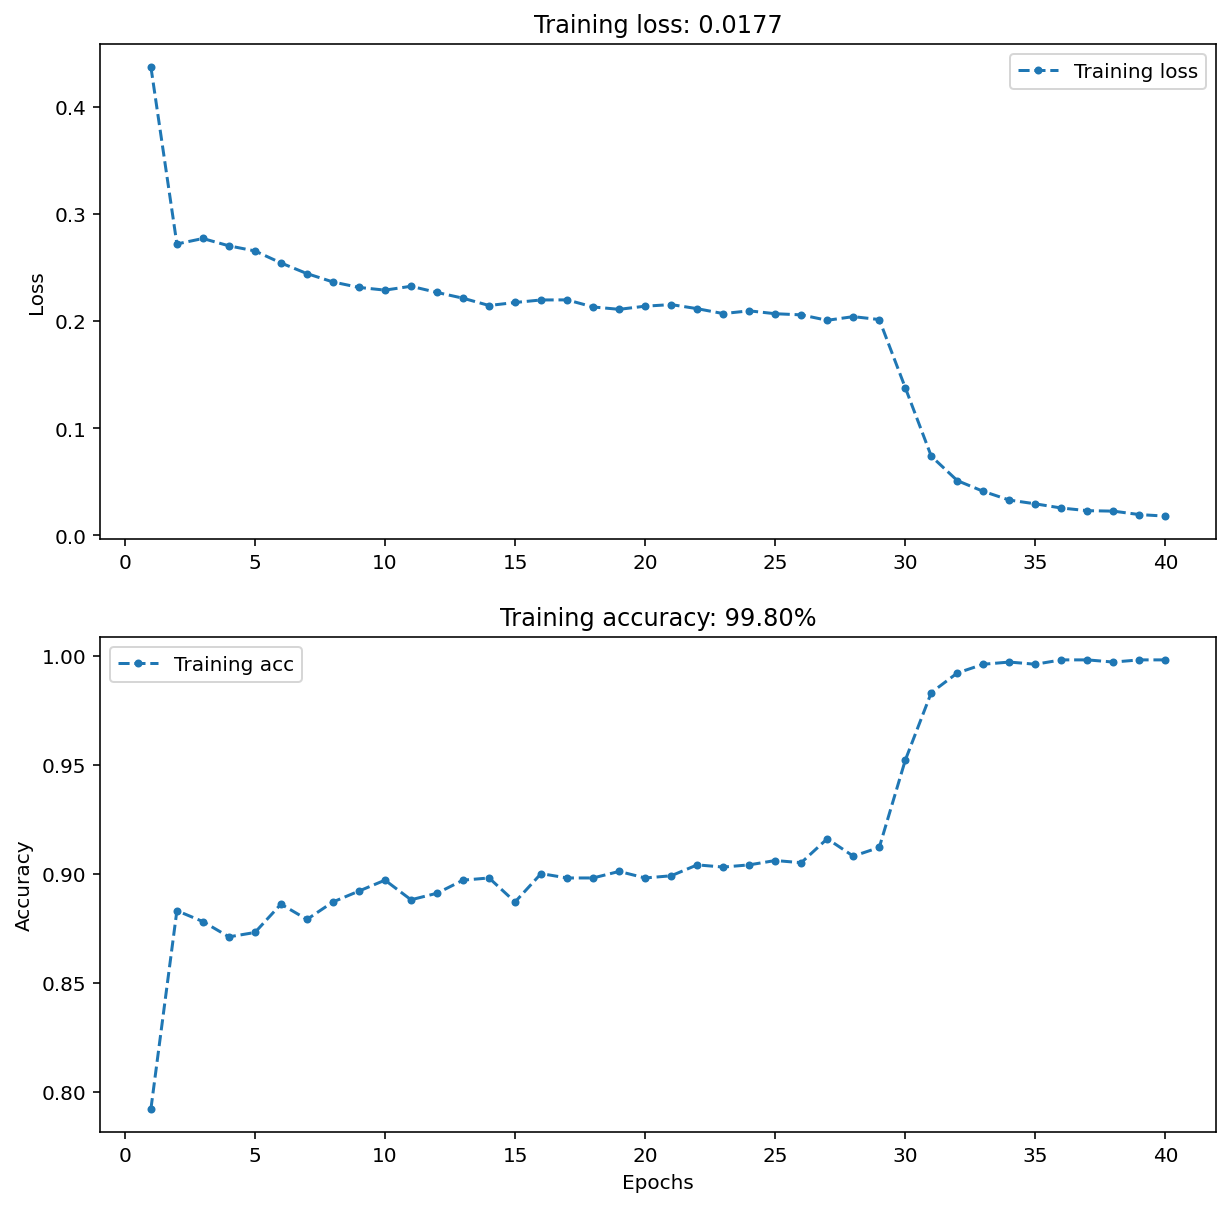

In [100]:
# Affichage de l'historique de l'entrainement
# Loss = mesure de l'erreur entre ce qui est attendu et observé
# Accuracy (justesse) = % de prédictions exactes
plot_loss_acc(history)

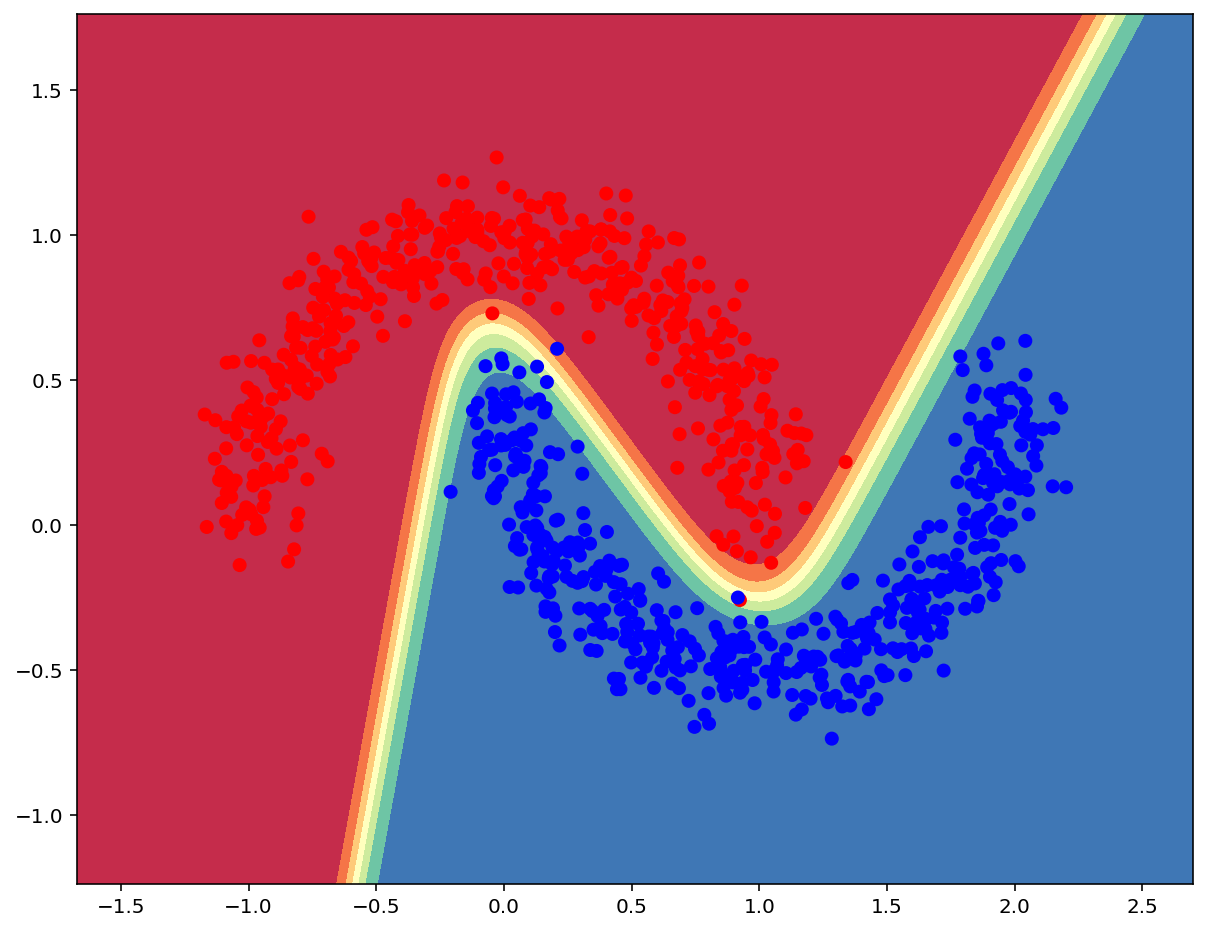

In [101]:
# Affiche la frontière de décision du modèle
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

x_train: (1000, 2). y_train: (1000,)


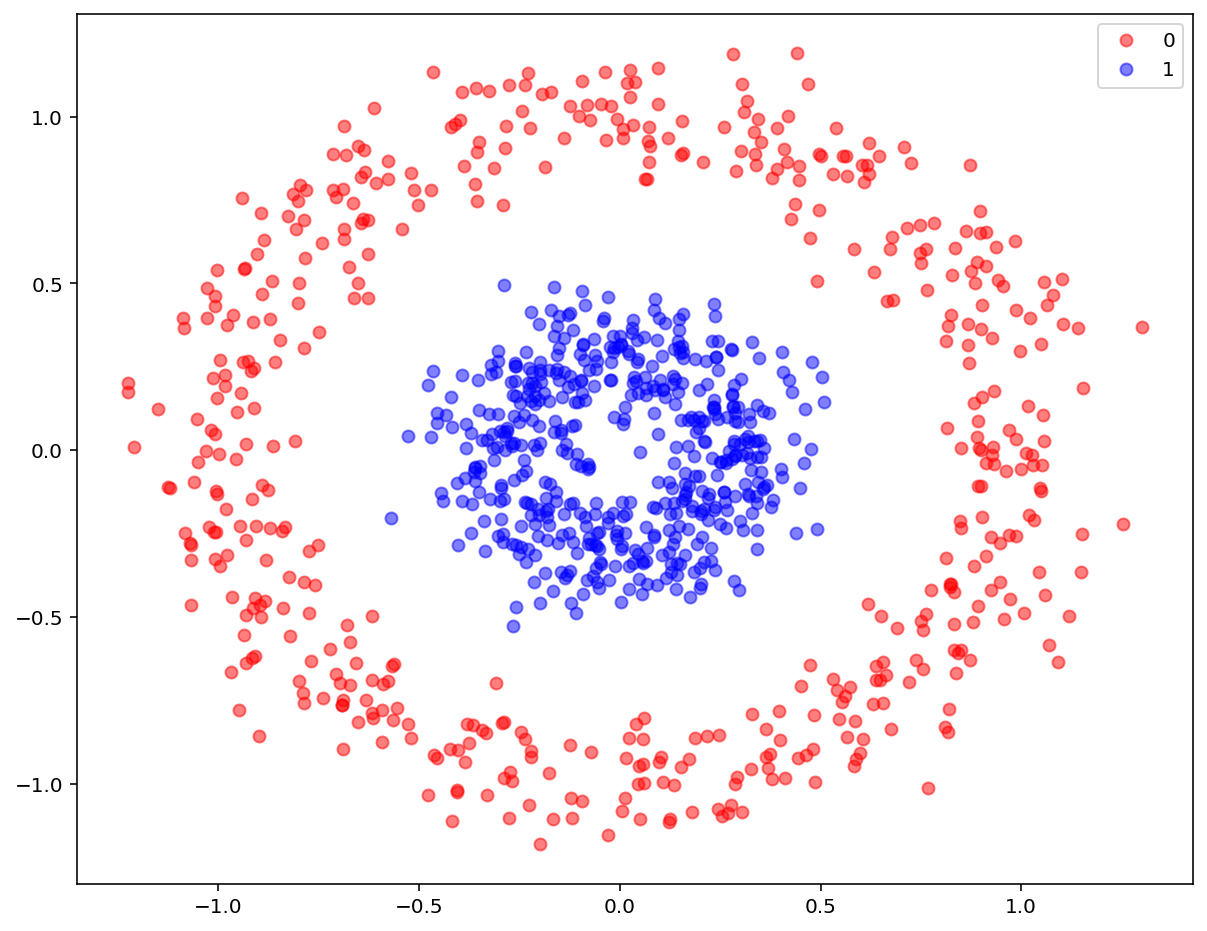

In [103]:
# Génération de données circulaires (donuts)
x_train, y_train = make_circles(n_samples=1000, noise=0.10, factor=0.3, random_state=0)

print(f"x_train: {x_train.shape}. y_train: {y_train.shape}")
plot_planar_data(x_train, y_train)

In [104]:
# Entrainer le modèle actuel sur le jeu de données donuts
# Mémoriser le résultat de l'entrainement dans la variable history
# TODO
history = model.fit(x_train, y_train, verbose=0, epochs=40)

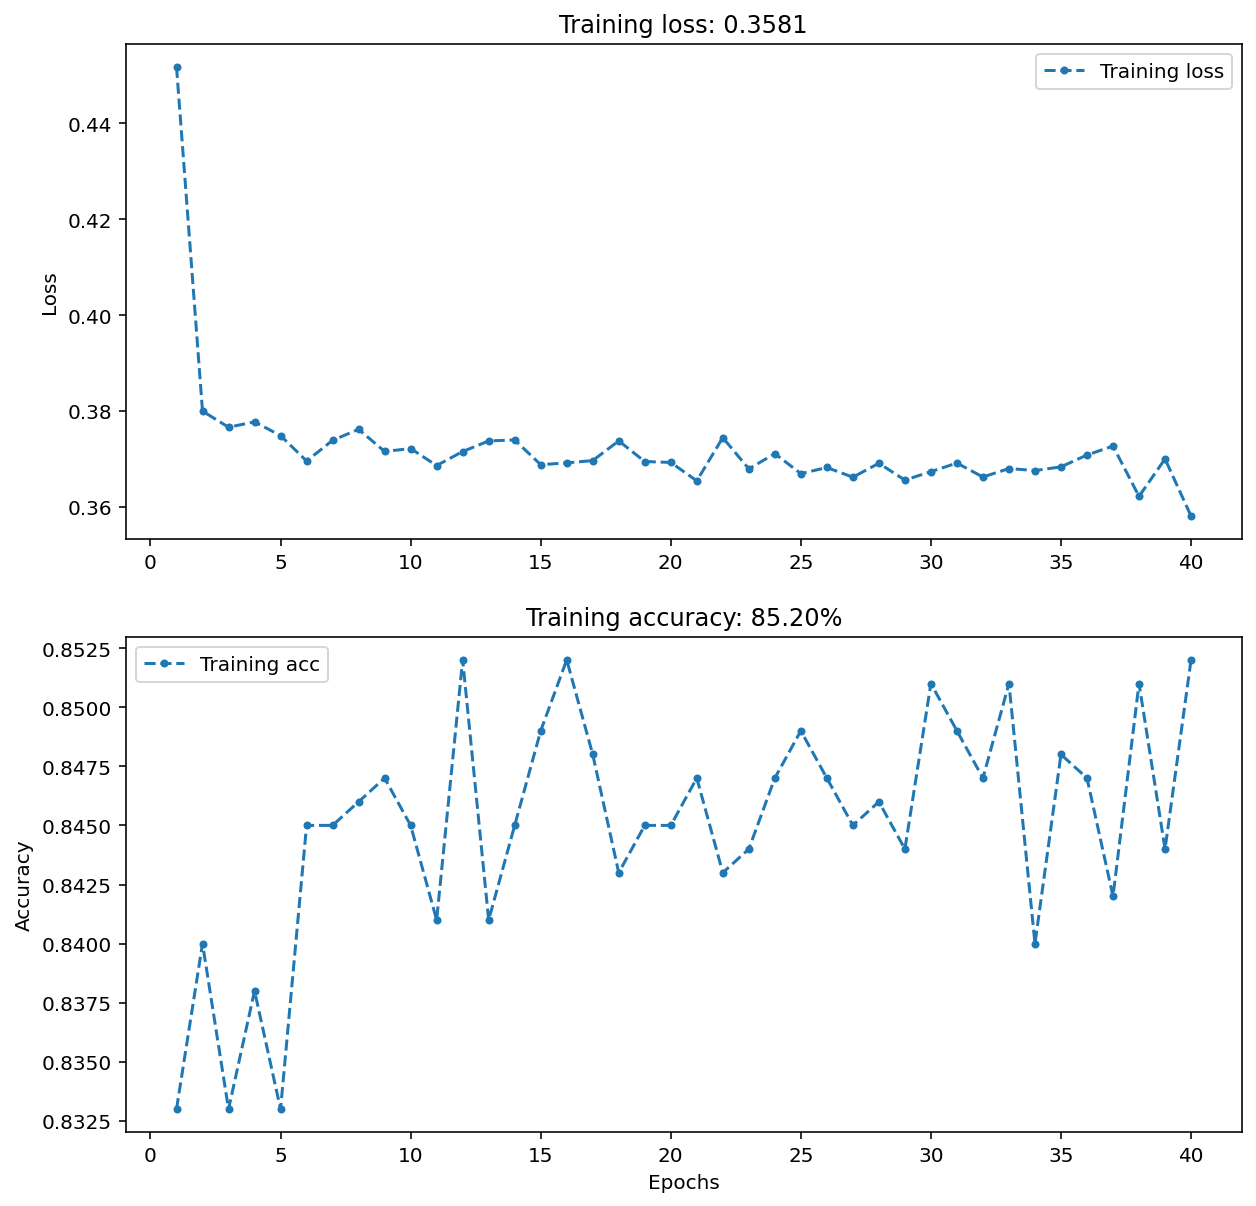

In [105]:
# Affichage de l'historique de l'entrainement
plot_loss_acc(history)

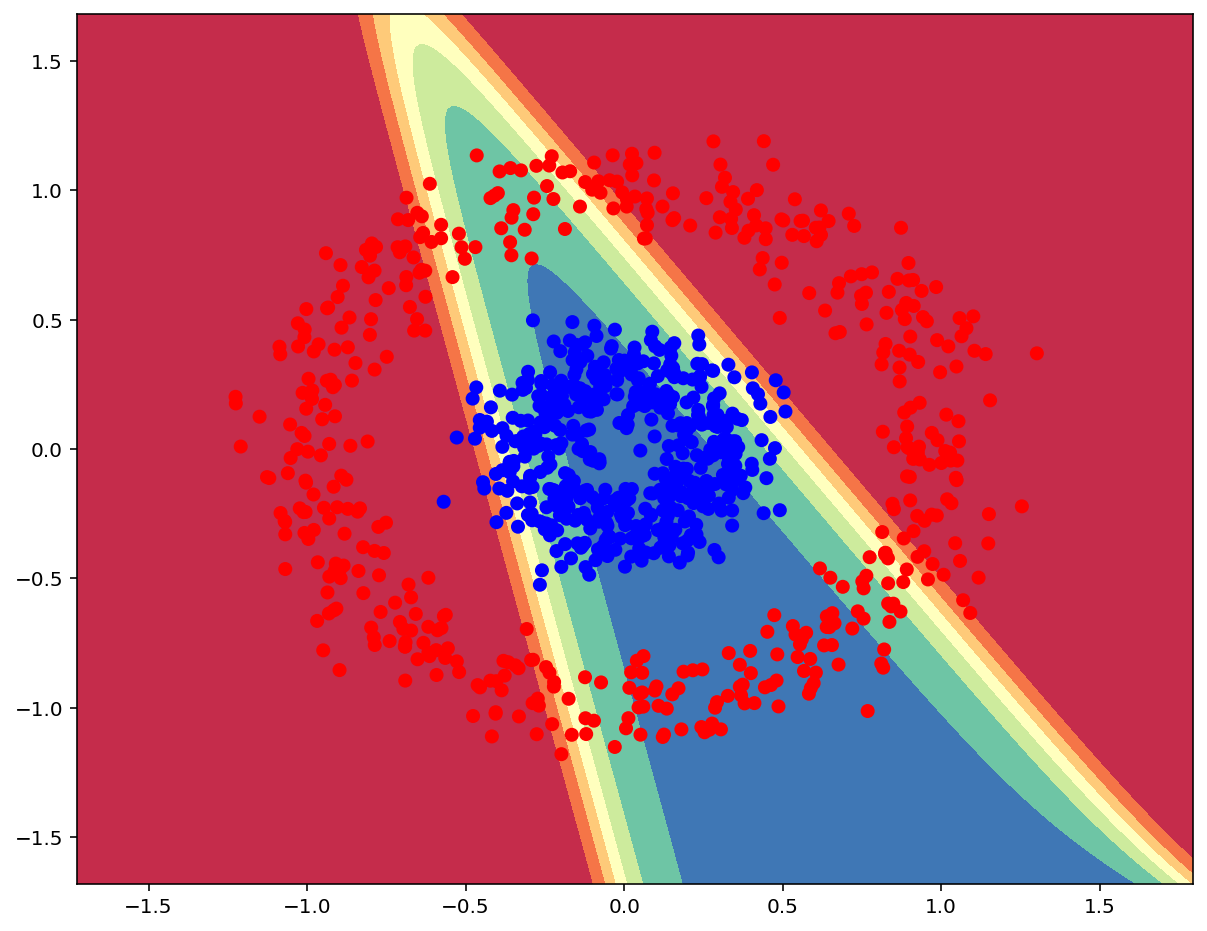

In [106]:
# Affiche la frontière de décision du modèle
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

In [ ]:
# Définir un nouveau modèle et l'entrainer sur le jeu de données donuts
# Il doit être capable d'atteindre une justesse (accuracy) d'au moins 95% sur ce jeu de données
# Mémoriser le résultat de l'entrainement dans la variable history
# TODO


In [ ]:
# Affichage de l'historique de l'entrainement
plot_loss_acc(history)

In [ ]:
# Affiche la frontière de décision du modèle
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

## Bonus

Etudier [cet exemple](https://www.tensorflow.org/tutorials/keras/classification).